#### Module import

In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split # Data Split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소'

##### Path

In [4]:
os.chdir('./3차 요청자료/소_3대 정리')
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소\\3차 요청자료\\소_3대 정리'

In [3]:
os.chdir('./3차 요청자료/2023-02-07근내지방_3')
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소\\3차 요청자료\\2023-02-07근내지방_3'

##### Check
> 또 마지막 변수명 외증조로 중복돼있음, 일단 파일 한번에 불러서 합친 다음 변수명 다시 바꾸기

In [5]:
# 파일이 존재하는 경로 불러오기 및 리스트
path = 'C:/Users/Owner/Desktop/윤태준/소/3차 요청자료/2023-02-07근내지방_3'
file_lst = os.listdir(path)# 파일 이름 담기
file_lst

['근내지방3_0.xlsx',
 '근내지방3_1.xlsx',
 '근내지방3_2.xlsx',
 '근내지방3_3.xlsx',
 '근내지방3_4.xlsx',
 '근내지방3_5.xlsx',
 '근내지방3_6.xlsx',
 '근내지방3_7.xlsx']

##### ↓ 반복문으로 파일 불러오면서, 하나의 DataFrame으로 합침 

In [10]:
df_3 = pd.DataFrame()
for i in file_lst:
    data_3 = pd.read_excel(path +'/'+i)
    df_3 = pd.concat([df_3, data_3])
    
df_3 = df_3.reset_index(drop = True)

In [12]:
# 확인
print(df_3.shape)
df_3.head()

(110345, 47)


,이표번호,KPN,성별,출생일,농가코드,농가등급,도축개월,도축일,등급,도체중,...,외증조할미형매 등심단면적 평균,외증조할미형매 등지방 평균,외증조할미형매 근내지방 평균,외증조할미형매 마릿수,외고고조할미 이표번호,외증조할미형매 도체중 평균.1,외증조할미형매 등심단면적 평균.1,외증조할미형매 등지방 평균.1,외증조할미형매 근내지방 평균.1,외증조할미형매 마릿수.1
0,2137173111,KPN1053,암,2019-03-28,398841,1+C,42,2022-09-21,1B,374,...,89.00,16.33,2.33,3,198856328.0,0.0,0.0,0.0,0.0,0
1,2150109802,KPN1060,거세,2020-04-28,263150,1A,28,2022-08-22,1++C,524,...,83.33,13.67,6.00,3,172418108.0,0.0,0.0,0.0,0.0,0
2,2133835356,KPN1099,암,2018-09-28,189147,1A,52,2023-01-03,1A,333,...,0.00,0.00,0.00,0,NaN,0.0,0.0,0.0,0.0,0
3,2156452289,KPN1284,암,2020-11-18,451221,1A,27,2023-01-26,1A,372,...,0.00,0.00,0.00,0,NaN,0.0,0.0,0.0,0.0,0
4,2147835365,KPN1060,암,2019-10-23,190620,1A,32,2022-06-07,2A,378,...,0.00,0.00,0.00,0,NaN,0.0,0.0,0.0,0.0,0


##### 변수명 재설정

In [13]:
df_3.columns

Index(['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호',
       '형매 도체중 평균', '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수',
       '외할미 이표번호', '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균',
       '어미형매 근내지방 평균', '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균',
       '외할미형매 등심단면적 평균', '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수',
       '외고조할미 이표번호', '외증조할미형매 도체중 평균', '외증조할미형매 등심단면적 평균', '외증조할미형매 등지방 평균',
       '외증조할미형매 근내지방 평균', '외증조할미형매 마릿수', '외고고조할미 이표번호', '외증조할미형매 도체중 평균.1',
       '외증조할미형매 등심단면적 평균.1', '외증조할미형매 등지방 평균.1', '외증조할미형매 근내지방 평균.1',
       '외증조할미형매 마릿수.1'],
      dtype='object')

In [14]:
# 원래 변수명
df_3.columns = ['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호',
       '형매 도체중 평균', '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수',
       '외할미 이표번호', '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균',
       '어미형매 근내지방 평균', '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균',
       '외할미형매 등심단면적 평균', '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수',
       '외고조할미 이표번호', '외증조할미형매 도체중 평균', '외증조할미형매 등심단면적 평균', '외증조할미형매 등지방 평균',
       '외증조할미형매 근내지방 평균', '외증조할미형매 마릿수', '외고고조할미 이표번호', '외고조할미형매_도체중_평균', '외고조할미형매_등심단면적_평균', '외고조할미형매_등지방_평균', '외고조할미형매_근내지방_평균',
    '외고조할미형매_마릿수'
]

In [15]:
cow_3 = df_3.copy()
cow_3 = cow_3[['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호',
       '형매 도체중 평균', '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수',
       '외할미 이표번호', '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균',
       '어미형매 근내지방 평균', '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균',
       '외할미형매 등심단면적 평균', '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수']]

In [16]:
print(cow_3.shape)
cow_3.columns

(110345, 35)


Index(['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호',
       '형매 도체중 평균', '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수',
       '외할미 이표번호', '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균',
       '어미형매 근내지방 평균', '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균',
       '외할미형매 등심단면적 평균', '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수'],
      dtype='object')

In [17]:
# 원 데이터와 변수명 변경 후 데이터 차이 확인
# numpy의 setdiff1d(a, b)를 이용해서, a와 b를 비교하여 b에 없는 것 확인
print(f'변경 후 변수명 : {np.setdiff1d(df_3.columns, cow_3.columns)}')
print(f'변경 전 변수명 : {np.setdiff1d(cow_3.columns, df_3.columns)}')

변경 후 변수명 : ['외고고조할미 이표번호' '외고조할미 이표번호' '외고조할미형매_근내지방_평균' '외고조할미형매_도체중_평균'
 '외고조할미형매_등심단면적_평균' '외고조할미형매_등지방_평균' '외고조할미형매_마릿수' '외증조할미형매 근내지방 평균'
 '외증조할미형매 도체중 평균' '외증조할미형매 등심단면적 평균' '외증조할미형매 등지방 평균' '외증조할미형매 마릿수']
변경 전 변수명 : []


In [18]:
cow_3.성별.value_counts()

거세    68328
암     42017
Name: 성별, dtype: int64

##### 성별 및 근내지방도 변수변환
> <p> <span style = 'color : orange' > 성별 : {F:암, N_M:거세} <span> </p>
> <p> <span style = 'color : orange' > 근내지방도 : {1 : (7~9), 0: (0~6)} <span> </p>

In [19]:
# 성별 암, 거세 => F, N_M 변환
cow_3.성별 = cow_3.성별.apply(lambda x: 'F' if x == '암' else 'N_M' if x =='거세' else x )
print('변경 전 성별 unique 및 counts')
print(df_3.성별.value_counts())
print('\n')
print('변경 후 성별 unique 및 counts')
print(cow_3.성별.value_counts())

변경 전 성별 unique 및 counts
거세    68328
암     42017
Name: 성별, dtype: int64


변경 후 성별 unique 및 counts
N_M    68328
F      42017
Name: 성별, dtype: int64


In [20]:
# 근내지방도 0, 1 변경
cow_3['근내지방도'] = cow_3['근내지방도'].apply(lambda x: 1 if x >= 7 else 0 if x < 7 else x)
print('변경 전 근내지방도 unique 및 counts')
print(df_3.근내지방도.value_counts())
print('\n')
print('변경 후 근내지방도 unique 및 counts')
print(cow_3.근내지방도.value_counts())

변경 전 근내지방도 unique 및 counts
6.0    27779
4.0    17824
5.0    13561
7.0    12600
8.0    10126
3.0     9495
9.0     8984
2.0     7891
1.0     1911
Name: 근내지방도, dtype: int64


변경 후 근내지방도 unique 및 counts
0.0    78461
1.0    31710
Name: 근내지방도, dtype: int64


##### full data export

In [21]:
cow_3.to_csv('3차 요청자료/소_3대 정리/다시/3대_소_789_cp.csv', encoding='cp949', index=False)
cow_3.to_csv('3차 요청자료/소_3대 정리/다시/3대_소_789.csv', index=False)

<h5> train_test_split, 7:3 </h5>

In [22]:
X_3 = cow_3.drop(['근내지방도'],axis=1)
Y_3 = cow_3.근내지방도
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size=0.3, random_state = 2023)

<h5> 값 다 같은 인덱스, 원래 같은 행이므로 이대로 합쳐도 원래 데이터 셋이 됨 </h5>

In [23]:
train_3 = pd.concat([X_train_3,Y_train_3], axis=1)
test_3 = pd.concat([X_test_3,Y_test_3], axis=1)

In [24]:
print(train_3.shape)
print(test_3.shape)

(77241, 35)
(33104, 35)


#### Export Data

In [ ]:
# train export
train_3.to_csv('../소_3대 정리/3_train_utf.csv', index=False) # utf
train_3.to_csv('../소_3대 정리/3_train_cp.csv',encoding= 'cp949', index=False) # cp949
# test export 
test_3.to_csv('../소_3대 정리/3_test_utf.csv', index=False) # utf
test_3.to_csv('../소_3대 정리/3_test_cp.csv',encoding= 'cp949', index=False) # cp949

In [33]:
train_3.columns

Index(['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '형매 도체중 평균',
       '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수', '외할미 이표번호',
       '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균', '어미형매 근내지방 평균',
       '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균', '외할미형매 등심단면적 평균',
       '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수', '근내지방도'],
      dtype='object')

##### 농장 번호에 따라 소들의 근내지방평균
> 1. <font color = pink> Pivot table </font>
> 2. <font color = pink> 시각화 </font>

##### Import Data

In [ ]:
cow_3 = pd.read_csv('3_total_cp.csv', encoding='cp949')
train_3 = pd.read_csv('3_train_cp.csv', encoding='cp949')
test_3 = pd.read_csv('3_test_cp.csv', encoding = 'cp949')

#### 농가 분류를 위한 작업
> 1. 농가 id 고유값 확인
> 2. 농가 id에 따른 등급이 있는데, 각 id별 farm_class가 동일한지 확인

In [26]:
train_3.columns

Index(['이표번호', 'KPN', '성별', '출생일', '농가코드', '농가등급', '도축개월', '도축일', '등급', '도체중',
       '등심단면적', '등지방두께', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '형매 도체중 평균',
       '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수', '외할미 이표번호',
       '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균', '어미형매 근내지방 평균',
       '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균', '외할미형매 등심단면적 평균',
       '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수', '근내지방도'],
      dtype='object')

#### 농가 등급 A, B, C으로 변수 추가

In [27]:
print(cow_3.농가등급.unique())
print(cow_3.농가등급.value_counts().sort_index())

['1+C' '1A' '1++C' '1C' '1+B' '2A' '1B' '1+A' '1++B' '2B' '3A' '2C' '3B'
 '1++A' '3C' '등외']
1++A       65
1++B      273
1++C      870
1+A      4220
1+B     17657
1+C     32803
1A      28067
1B      15885
1C       6804
2A       2231
2B        927
2C        306
3A         87
3B        103
3C         29
등외         18
Name: 농가등급, dtype: int64


In [29]:
cow_3['농가_등급_1'] = cow_3['농가등급'].apply(lambda x: 'A' if ((x == '1++A')|(x == '1++B')|(x == '1++C'))  else 'B' if ((x == '1+A')|(x == '1+B')|(x == '1+C')) else 'C')

In [30]:
a_cl = cow_3[cow_3['농가_등급_1']=='A']
b_cl = cow_3[cow_3['농가_등급_1']=='B']
c_cl = cow_3[cow_3['농가_등급_1']=='C']
a_cl = a_cl[['농가코드','농가등급','농가_등급_1']]
b_cl = b_cl[['농가코드','농가등급','농가_등급_1']]
c_cl = c_cl[['농가코드','농가등급','농가_등급_1']]

In [31]:
print(a_cl.농가등급.unique())
print(b_cl.농가등급.unique())
print(c_cl.농가등급.unique())

['1++C' '1++B' '1++A']
['1+C' '1+B' '1+A']
['1A' '1C' '2A' '1B' '2B' '3A' '2C' '3B' '3C' '등외']


In [37]:
cow_3.drop(['농가등급'], axis=1, inplace=True)

In [38]:
print(cow_3.shape)

(110345, 35)


In [39]:
cow_3.to_csv('C:/Users/Owner/Desktop/윤태준/소/3차 요청자료/소_3대 정리/다시/3대_농가등급추가_789_cp.csv', encoding='cp949', index=False)

In [5]:
df = pd.read_csv('C:/Users/Owner/Desktop/윤태준/소/3차 요청자료/소_3대 정리/다시/3대_농가등급추가_789_cp.csv', encoding='cp949')
print(df.shape)

(110345, 35)


##### 변수명 영어 변경

In [45]:
df.columns

Index(['이표번호', 'KPN', '성별', '출생일', '농가코드', '도축개월', '도축일', '등급', '도체중', '등심단면적',
       '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '형매 도체중 평균',
       '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수', '외할미 이표번호',
       '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균', '어미형매 근내지방 평균',
       '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균', '외할미형매 등심단면적 평균',
       '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수', '농가_등급_1'],
      dtype='object')

In [46]:
df.columns = ['id', 'KPN', 'gender', 'bir', 'farm_id', 'sl_m', 'sl_d', 'class', 's_w', 'i_a',
       'f_t', 'target', 'b_c', 'f_c', 'm_l', 'organ', 'mom_id', 's_m_w',
       's_m_i', 's_f_m', 's_t_m', 's_c', 'a_id', 'a_s_m_w', 'a_s_m_i', 'a_s_f_m', 'a_s_t_m',
       'a_s_c', 'b_id', 'b_s_m_w', 'b_s_m_i', 'b_s_f_m', 'b_s_t_m', 'b_s_c', 'farm_level']

##### 농장 등급 추가한 것, train_test_split, export

In [48]:
X_3 = df.drop(['target'],axis=1)
Y_3 = df.target
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size=0.3, random_state = 7777)

In [49]:
train_3 = pd.concat([X_train_3,Y_train_3], axis=1)
test_3 = pd.concat([X_test_3,Y_test_3], axis=1)

In [50]:
train_3.to_csv('3차 요청자료/소_3대 정리/다시/train_789.csv', encoding='cp949', index=False)
test_3.to_csv('3차 요청자료/소_3대 정리/다시/test_789.csv', encoding='cp949', index=False)

In [51]:
print(train_3.gender.value_counts())
print(train_3.farm_level.value_counts())

N_M    47859
F      29382
Name: gender, dtype: int64
B    38337
C    38046
A      858
Name: farm_level, dtype: int64


#### 반복문을 이용하여 단변량 로지스틱 돌리기

##### full data set univariate logistic regression

In [ ]:
for i in range(0,19):
    print(f'순서:{i+1}번째 변수')
    model = sm.Logit.from_formula('target ~ uni_logit_df.iloc[:,i]', uni_logit_df).fit()
    print(f'독립변수 이름: {uni_logit_df.columns[i]}')
    print(model.summary())
    print('============='*3)
    print(f'모델 AIC:{model.aic}')
    print('\n')
    print(f'오즈비{np.exp(model.params)}')

##### split data set(train) univariate logistic regression

In [5]:
train_3 = pd.read_csv('등급추가_train_cp.csv', encoding='cp949')
test_3 = pd.read_csv('등급추가_test_cp.csv', encoding='cp949')

In [ ]:
# train data set
for i in range(0,19):
    print(f'순서:{i+1}번째 변수')
    model = sm.Logit.from_formula('target ~ train_3.iloc[:,i]', train_3).fit()
    print(f'독립변수 이름: {train_3.columns[i]}')
    print(model.summary())
    print('============='*3)
    print(f'모델 AIC:{model.aic}')
    print('\n')
    print(f'오즈비{np.exp(model.params)}')
    print('\n')

##### confusion matrix

In [8]:
# confusion matrix 사용을 위한 라이브러리
from sklearn.metrics import confusion_matrix

# confusion matrix 그리는 함수 
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
# 예측값과 참값 
pred_labels = np.argmax(predictions, axis=1)
true_labels = test_set.labels

#메인 실행 
confusion_matrix = confusion_matrix(true_labels, pred_labels)
plot_confusion_matrix(confusion_matrix, labels=labels, normalize=True)

In [ ]:
from sklearn.metrics import roc_auc_score 
roc_auc = roc_auc_score(y_true, y_pred) print("ROC AUC Score: {}".format(roc_auc))

C:\Users\Owner\AppData\Local\Temp\ipykernel_70676\2566102714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['도축개월'], label= '도축개월')


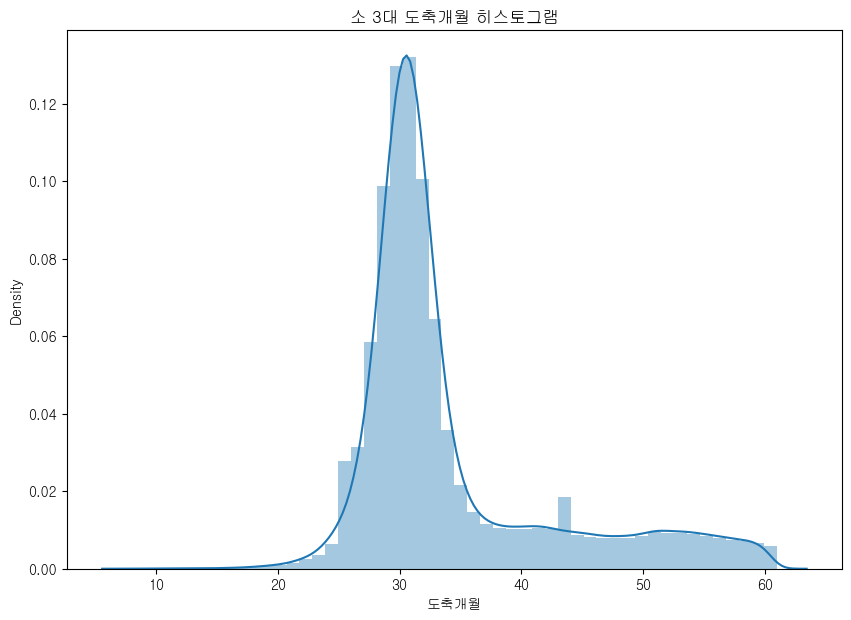

In [14]:
plt.figure(figsize=(10,7))
sns.distplot(df['도축개월'], label= '도축개월')

plt.title('소 3대 도축개월 히스토그램')
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_70676\3171815918.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['도축개월'], label= '도축개월')


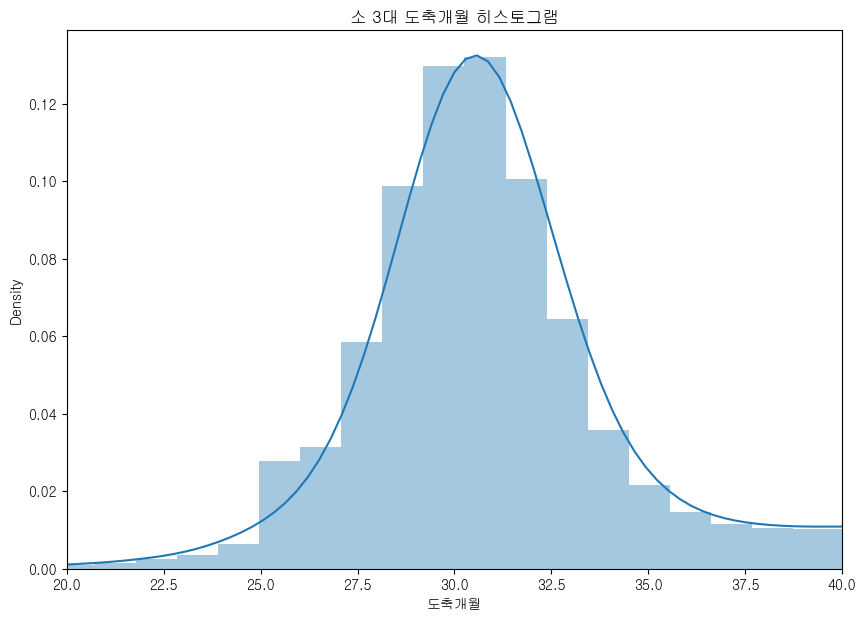

In [16]:
plt.figure(figsize=(10,7))
sns.distplot(df['도축개월'], label= '도축개월')

plt.title('소 3대 도축개월 히스토그램')
plt.xlim(20,40)
plt.show()

In [4]:
# null drop => 110121
# codition : 25 <= age <=40 => 88568
# split data 7:3 => 
print(f'789target확인: 원래{11221+9125+8333 }개, 변경 후 {28679 }개')
print(f'9target확인: 원래{8333}개, 변경 후 {8333}개')
print(f'7:3={round(88568*0.7,0)}:{round(88568*0.3,0)}')

789target확인: 원래28679개, 변경 후 28679개
9target확인: 원래8333개, 변경 후 8333개
7:3=61998.0:26570.0
